# Random forest con scikit-learn para diabetes

In [97]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [98]:
#Cargamos dataset a utilizar
df_diabetes = pd.read_csv('./diabetes.csv',sep = ',', header=None)

## Exploración de datos

In [99]:
#Visualizacion del dataframe
df_diabetes.sample(10)

,0,1,2,3,4,5,6,7,8
710,3,158,64,13,387,31.2,0.295,24,0
356,1,125,50,40,167,33.3,0.962,28,1
654,1,106,70,28,135,34.2,0.142,22,0
134,2,96,68,13,49,21.1,0.647,26,0
303,5,115,98,0,0,52.9,0.209,28,1
289,5,108,72,43,75,36.1,0.263,33,0
763,10,101,76,48,180,32.9,0.171,63,0
168,4,110,66,0,0,31.9,0.471,29,0
532,1,86,66,52,65,41.3,0.917,29,0
700,2,122,76,27,200,35.9,0.483,26,0


In [100]:
#Vamos a renombrar las columnas de manera correcta
column_names = ['1. Number of times pregnant', '2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test', '3. Diastolic blood pressure (mm Hg)', '4. Triceps skin fold thickness (mm)', '5. 2-Hour serum insulin (mu U/ml)', '6. Body mass index (weight in kg/(height in m)^2)', '7. Diabetes pedigree function', '8. Age (years)', '9. Class variable (0 or 1)']
df_diabetes.columns = column_names

In [101]:
#Verificacion de datos
df_diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


En este conjunto de datos hay 8 características de entrada (features) y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [102]:
#Analizamos el shape del objeto
df_diabetes.shape

(768, 9)

In [103]:
#Visualizamos los tipos de datos
df_diabetes.dtypes

1. Number of times pregnant                                                      int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
3. Diastolic blood pressure (mm Hg)                                              int64
4. Triceps skin fold thickness (mm)                                              int64
5. 2-Hour serum insulin (mu U/ml)                                                int64
6. Body mass index (weight in kg/(height in m)^2)                              float64
7. Diabetes pedigree function                                                  float64
8. Age (years)                                                                   int64
9. Class variable (0 or 1)                                                       int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [104]:
#Separamos en X e y
X = df_diabetes.drop('9. Class variable (0 or 1)', axis = 1)
y = df_diabetes['9. Class variable (0 or 1)']

In [105]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 00000)

In [106]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo
random_forest = RandomForestClassifier(max_depth = 2, n_estimators = 10, random_state = 00000)

In [107]:
#Entrenamiento
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=0)

In [108]:
#Calculo de las predicciones en Train y Test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluación del modelo

In [109]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_acc = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_acc = accuracy_score(y_test, y_test_pred)

print('El acc en train es:', train_acc)
print('El acc en test es:', test_acc)

El acc en train es: 0.7225325884543762
El acc en test es: 0.7402597402597403


In [110]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending = False)

# Mostrar
feature_importances_df

,feature,importance
7,8. Age (years),0.378572
1,2. Plasma glucose concentration a 2 hours in a...,0.157900
0,1. Number of times pregnant,0.113060
4,5. 2-Hour serum insulin (mu U/ml),0.090405
5,6. Body mass index (weight in kg/(height in m)^2),0.089078
6,7. Diabetes pedigree function,0.073583
3,4. Triceps skin fold thickness (mm),0.069421
2,3. Diastolic blood pressure (mm Hg),0.027981


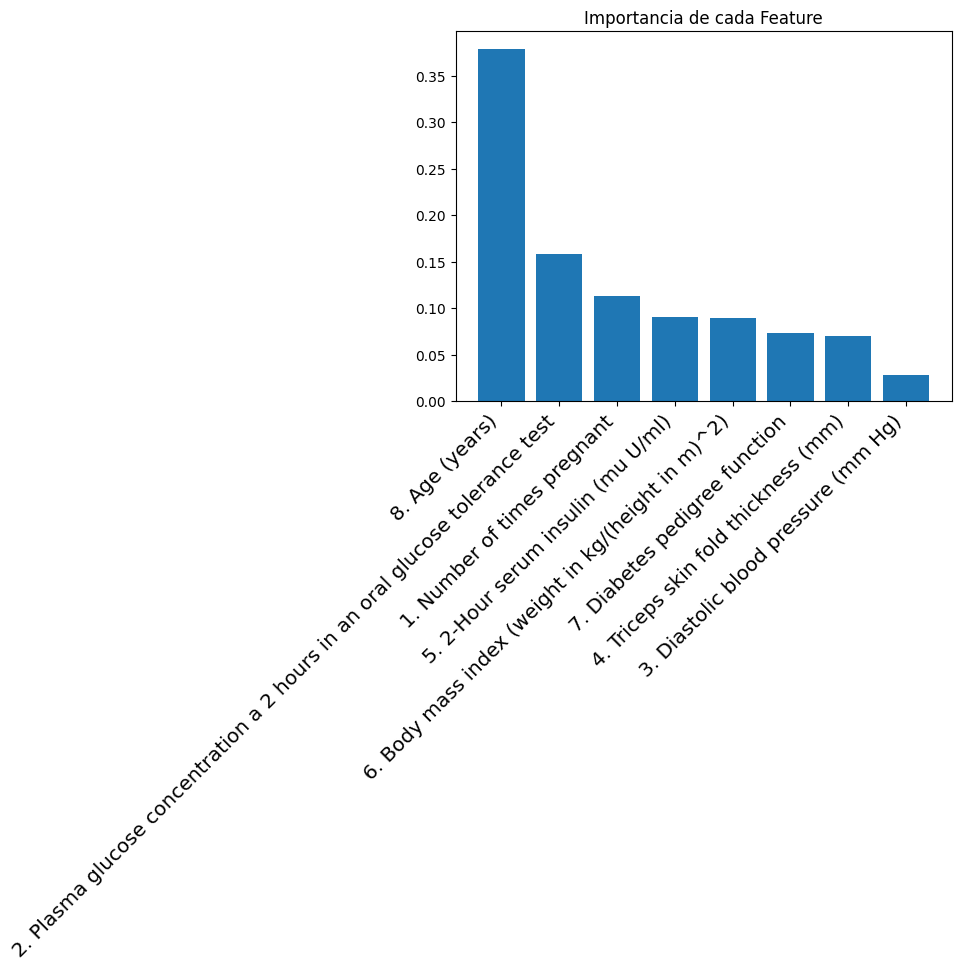

In [111]:
importances = feature_importances_df.importance
features = feature_importances_df.feature
plt.bar(features, importances)
plt.xticks(rotation = 45, horizontalalignment = "right", fontweight = "light", fontsize = "x-large")
plt.title('Importancia de cada Feature')
plt.show()

**¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**

Al aumentar el numero de estimadores (mayor numero de arboles en el Random Forest), se sobreajusta el modelo al conjunto de entrenamiento lo que se viasualiza en el accuraccy tendiendo a 1. Esto no es la mejor practica porque le quita generalidad al modelo.

Haremos una prueba con Grid Search CV para ver cuales dice que son los mejores parametros para el modelo

In [112]:
#Importamos la libreria para hacer el GridSerachCV del Random Forest
from sklearn.model_selection import GridSearchCV

#Definimos el random forest
rf = RandomForestClassifier()

#Definimos los parametros sobre los cuales haremos la busqueda
parametros = {
  'n_estimators' : range(4, 45),
  'max_depth' : range(2, 8)
  }

#Ejecutamos el GridSearch sobre el arbol binario y hacemos el ajuste con X_train, y_train
rf_grid = GridSearchCV(rf, parametros, cv = 5, scoring='accuracy').fit(X_train, y_train)

In [113]:
#Veamos los mejores parametros 
rf_grid.best_params_

{'max_depth': 7, 'n_estimators': 29}

In [114]:
#Calculo de las predicciones en Train y Test
y_train_pred_grid = rf_grid.predict(X_train)
y_test_pred_grid = rf_grid.predict(X_test)

In [115]:
#Calculo el accuracy en Train
train_acc_grid = accuracy_score(y_train, y_train_pred_grid)

#Calculo el accuracy en Test
test_acc_grid = accuracy_score(y_test, y_test_pred_grid)

print('El acc con los mejores parametros en train es:', train_acc_grid)
print('El acc con los mejores parametros en test es:', test_acc_grid)

El acc con los mejores parametros en train es: 0.925512104283054
El acc con los mejores parametros en test es: 0.7662337662337663
